In [1]:
# Matplotlib 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (32.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and direc

In [1]:
# 런타임 다시 시작 후 아래 코드 실행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [12]:
import pandas as pd
import numpy as np

# 엑셀 파일 경로 지정
excel_file_path = '/content/20240110_사고데이터.xlsx'

# 엑셀 파일을 데이터프레임으로 읽기
ttlclaim = pd.read_excel(excel_file_path)

# 데이터프레임 확인
display(ttlclaim)

,unique_claim_id,계약번호,UY,종목명,수재보험료,수재발생손해액
0,2019.07~08 Torrential Rainfall(STATS),C2019028655442,201901,종합보험,69690835,2896305
1,2019.07~08 Torrential Rainfall(STATS),C2019024672398,201901,종합보험,97720575,6298932
2,2019.07~08 Torrential Rainfall(STATS),C2019022648225,201901,종합보험,107272821,4466931
3,2019.07~08 Torrential Rainfall(STATS),C2019014917987,201901,종합보험,4933150291,783680
4,2019.07~08 Torrential Rainfall(STATS),C2019014789929,201901,종합보험,122831588,151200
...,...,...,...,...,...,...
159417,UAE STORM (MAY 2020),C2015020859067,201501,기술보험,99044806,12846339
159418,Yecheon Pumped Storage Power Plant Flood,C2020012141755,202001,종합보험,575607015,33808436280
159419,농협 BBB 수재 XOL,C2021012373226,202101,기타특종보험,1199007600,845074316
159420,폴라리스쉬핑(주),C2019017271961,201901,선박보험,6310437,19287917760


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [56]:
ttlclaim.info()
ttlclaim.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159422 entries, 0 to 159421
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   unique_claim_id  159422 non-null  object
 1   계약번호             159422 non-null  object
 2   UY               159422 non-null  int64 
 3   종목명              159422 non-null  object
 4    수재보험료           159422 non-null  object
 5    수재발생손해액         159422 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.3+ MB


Index(['unique_claim_id', '계약번호', 'UY', '종목명', ' 수재보험료 ', ' 수재발생손해액 '], dtype='object')

In [13]:
# 수재보험료와 수재발생손해액 열을 숫자형으로 변환(문자열 " - "은 NaN으로 대체)
ttlclaim[' 수재보험료 '] = pd.to_numeric(ttlclaim[' 수재보험료 '], errors='coerce')
ttlclaim[' 수재발생손해액 '] = pd.to_numeric(ttlclaim[' 수재발생손해액 '], errors='coerce')

# 국내기술보험

In [14]:
# 보종이 "기술보험"인 행들만 선택하여 새로운 데이터프레임 생성
domestic_tech = ttlclaim[ttlclaim['종목명'] == '기술보험']

# 결과 확인
display(domestic_tech)

,unique_claim_id,계약번호,UY,종목명,수재보험료,수재발생손해액
12,2019.07~08 Torrential Rainfall(STATS),C2018026278750,201801,기술보험,5.933400e+07,3190000.0
13,2019.07~08 Torrential Rainfall(STATS),C2017026631049,201701,기술보험,1.217125e+09,544244.0
14,2019.07~08 Torrential Rainfall(STATS),C2016028910852,201601,기술보험,1.027787e+09,362371.0
15,2019.07~08 Torrential Rainfall(STATS),C2008040248874,200804,기술보험,7.791979e+08,157600.0
16,2020 CHINA SOUTHERN FLOOD,C2020022783508,201901,기술보험,2.072176e+08,4682384.0
...,...,...,...,...,...,...
159413,UAE STORM (JAN 2020),C2017013164972,201601,기술보험,6.589512e+07,33676584.0
159414,UAE STORM (JAN 2020),C2008040610894,200804,기술보험,3.941057e+08,227752.0
159415,UAE STORM (MARCH 2020),C2018019359232,201601,기술보험,2.200111e+08,1042201.0
159416,UAE STORM (MARCH 2020),C2013020398449,201204,기술보험,9.092916e+07,177245.0


In [ ]:
domestic_tech.head(30)

,unique_claim_id,계약번호,UY,종목명,수재보험료,수재발생손해액
12,2019.07~08 Torrential Rainfall(STATS),C2018026278750,201801,기술보험,5.933400e+07,3.190000e+06
13,2019.07~08 Torrential Rainfall(STATS),C2017026631049,201701,기술보험,1.217125e+09,5.442440e+05
14,2019.07~08 Torrential Rainfall(STATS),C2016028910852,201601,기술보험,1.027787e+09,3.623710e+05
15,2019.07~08 Torrential Rainfall(STATS),C2008040248874,200804,기술보험,7.791979e+08,1.576000e+05
16,2020 CHINA SOUTHERN FLOOD,C2020022783508,201901,기술보험,2.072176e+08,4.682384e+06
17,2020 CHINA SOUTHERN FLOOD,C2020016446738,201901,기술보험,3.732823e+08,8.830000e+03
18,2020 CHINA SOUTHERN FLOOD,C2020016445552,201901,기술보험,1.253700e+07,1.579716e+07
19,2020 CHINA SOUTHERN FLOOD,C2019036591531,201701,기술보험,4.363071e+08,3.377028e+07
20,2020 CHINA SOUTHERN FLOOD,C2019022620492,201801,기술보험,1.445761e+08,2.725310e+05
21,2020 CHINA SOUTHERN FLOOD,C2019022419467,201901,기술보험,1.059900e+09,7.007261e+06


In [59]:
domestic_tech.columns

Index(['unique_claim_id', '계약번호', 'UY', '종목명', ' 수재보험료 ', ' 수재발생손해액 '], dtype='object')

In [15]:
# claim 횟수 계산 및 데이터 정리
domestic_tech['claim횟수'] = domestic_tech.groupby(['unique_claim_id', '계약번호']).cumcount() + 1
domestic_tech['수재보험료누적'] = domestic_tech.groupby(['unique_claim_id', '계약번호'])[' 수재보험료 '].cumsum()
domestic_tech['수재발생손해액누적'] = domestic_tech.groupby(['unique_claim_id', '계약번호'])[' 수재발생손해액 '].cumsum()

# 중복된 데이터 삭제
domestic_tech_for_analysis = domestic_tech.drop_duplicates(subset=['unique_claim_id', '계약번호'], keep='last')

# 필요한 열만 선택
domestic_tech_for_analysis = domestic_tech_for_analysis[['unique_claim_id', '계약번호', 'UY', '종목명', '수재보험료누적', '수재발생손해액누적', 'claim횟수']]

display(domestic_tech_for_analysis)

<ipython-input-15-ff65f93cc289>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_tech['claim횟수'] = domestic_tech.groupby(['unique_claim_id', '계약번호']).cumcount() + 1
<ipython-input-15-ff65f93cc289>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic_tech['수재보험료누적'] = domestic_tech.groupby(['unique_claim_id', '계약번호'])[' 수재보험료 '].cumsum()
<ipython-input-15-ff65f93cc289>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,claim횟수
12,2019.07~08 Torrential Rainfall(STATS),C2018026278750,201801,기술보험,5.933400e+07,3190000.0,1
13,2019.07~08 Torrential Rainfall(STATS),C2017026631049,201701,기술보험,1.217125e+09,544244.0,1
14,2019.07~08 Torrential Rainfall(STATS),C2016028910852,201601,기술보험,1.027787e+09,362371.0,1
15,2019.07~08 Torrential Rainfall(STATS),C2008040248874,200804,기술보험,7.791979e+08,157600.0,1
16,2020 CHINA SOUTHERN FLOOD,C2020022783508,201901,기술보험,2.072176e+08,4682384.0,1
...,...,...,...,...,...,...,...
159413,UAE STORM (JAN 2020),C2017013164972,201601,기술보험,6.589512e+07,33676584.0,1
159414,UAE STORM (JAN 2020),C2008040610894,200804,기술보험,3.941057e+08,227752.0,1
159415,UAE STORM (MARCH 2020),C2018019359232,201601,기술보험,2.200111e+08,1042201.0,1
159416,UAE STORM (MARCH 2020),C2013020398449,201204,기술보험,9.092916e+07,177245.0,1


In [ ]:
domestic_tech_for_analysis.head(30)

,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,claim횟수
12,2019.07~08 Torrential Rainfall(STATS),C2018026278750,201801,기술보험,5.933400e+07,3.190000e+06,1
13,2019.07~08 Torrential Rainfall(STATS),C2017026631049,201701,기술보험,1.217125e+09,5.442440e+05,1
14,2019.07~08 Torrential Rainfall(STATS),C2016028910852,201601,기술보험,1.027787e+09,3.623710e+05,1
15,2019.07~08 Torrential Rainfall(STATS),C2008040248874,200804,기술보험,7.791979e+08,1.576000e+05,1
16,2020 CHINA SOUTHERN FLOOD,C2020022783508,201901,기술보험,2.072176e+08,4.682384e+06,1
17,2020 CHINA SOUTHERN FLOOD,C2020016446738,201901,기술보험,3.732823e+08,8.830000e+03,1
18,2020 CHINA SOUTHERN FLOOD,C2020016445552,201901,기술보험,1.253700e+07,1.579716e+07,1
19,2020 CHINA SOUTHERN FLOOD,C2019036591531,201701,기술보험,4.363071e+08,3.377028e+07,1
20,2020 CHINA SOUTHERN FLOOD,C2019022620492,201801,기술보험,1.445761e+08,2.725310e+05,1
21,2020 CHINA SOUTHERN FLOOD,C2019022419467,201901,기술보험,1.059900e+09,7.007261e+06,1


In [61]:
# '수재보험료누적' 열에서 NaN 값 확인
nan_values1 = domestic_tech_for_analysis['수재보험료누적'].isna()

# NaN 값을 가진 행만 출력
rows_with_nan1 = domestic_tech_for_analysis[nan_values1]

display(rows_with_nan1) # 총 29개 행

,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,claim횟수
444,2022.08 Monsoon Rainfall,C2021018622174,202001,기술보험,NaN,38500000.0,1
7476,C2017031237959-20200429,C2017031237959,201701,기술보험,NaN,63255.0,1
28087,C2019016892199-20191121,C2019016892199,201901,기술보험,NaN,NaN,1
45113,C2019036134345-20191125,C2019036134345,201901,기술보험,NaN,94922.0,1
67589,C2020024648379-20200415,C2020024648379,201901,기술보험,NaN,NaN,1
89087,C2020032669791-20210416,C2020032649854,202001,기술보험,NaN,NaN,1
91662,C2020034101210-20210927,C2020034101210,202001,기술보험,NaN,216000.0,1
91663,C2020034101251-20210108,C2020034101210,202001,기술보험,NaN,22500.0,1
92183,C2021010444447-20210707,C2021010444436,202001,기술보험,NaN,NaN,1
93720,C2021013161767-20220718,C2021013161767,202101,기술보험,NaN,31891970.0,1


In [62]:
# '수재발생손해액누적' 열에서 NaN 값 확인
nan_values2 = domestic_tech_for_analysis['수재발생손해액누적'].isna()

# NaN 값을 가진 행만 출력
rows_with_nan2 = domestic_tech_for_analysis[nan_values2]

display(rows_with_nan2)

,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,claim횟수
73,202007~08 Monsoon Rainfall,C2020024363494,202001,기술보험,2.083200e+07,NaN,2
698,C2009090589451-20221006,C2009090589451,200904,기술보험,1.406180e+09,NaN,1
1090,C2011040539990-20191213,C2011040539990,201104,기술보험,1.269638e+09,NaN,1
1091,C2011040539990-20200116,C2011040539990,201104,기술보험,1.269638e+09,NaN,1
1094,C2011040539990-20210301,C2011040539990,201104,기술보험,1.269638e+09,NaN,1
1095,C2011050300161-20190801,C2011050300161,201104,기술보험,1.874608e+09,NaN,1
1106,C2011100373953-20190227,C2011100373953,201104,기술보험,7.917821e+08,NaN,1
1109,C2012030920781-20190529,C2012030920781,201104,기술보험,7.463810e+08,NaN,1
1111,C2012030920781-20190928,C2012030920781,201104,기술보험,7.463810e+08,NaN,1
1113,C2012030920781-20200428,C2012030920781,201104,기술보험,7.463810e+08,NaN,1


In [64]:
nan_values2.value_counts() # 총 527개의 NaN

False    10120
True       527
Name: 수재발생손해액누적, dtype: int64

In [16]:
# 수재발생손해액누적 NaN 값이 있는 행 제외
df = domestic_tech_for_analysis.dropna(subset=['수재발생손해액누적'])
# 수재보험료누적 NaN 값 처리 (0으로 대체)
df.fillna(0, inplace=True)

<ipython-input-16-6fd798446652>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [67]:
# 필요한 열만 선택
selected_columns = ['수재보험료누적', '수재발생손해액누적', 'claim횟수']
selected_data = df[selected_columns]

# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=2,init='k-means++', max_iter=1000, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-67-b930a18abe8c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(scaled_data)


In [68]:
# 표시된 데이터 포인트의 갯수 출력
cluster_counts = df['Cluster'].value_counts()
for cluster_num, count in cluster_counts.items():
    print(f"Cluster {cluster_num}: {count} data points")

Cluster 0: 10105 data points
Cluster 1: 15 data points


In [69]:
import numpy as np

# 클러스터 중심 값 (스케일링 이전의 값)
centroids_scaled = kmeans.cluster_centers_

# 중심 값을 스케일링 이전의 값으로 변환
centroids_original = scaler.inverse_transform(centroids_scaled)

# 출력 형식 지정 (부동숫자 e 사용 안 함, 천 단위 쉼표 사용)
np.set_printoptions(suppress=True, precision=10, formatter={'float': '{:,.0f}'.format})

print("Centroid Values (Original Scale):")
for cluster_num, centroid in enumerate(centroids_original):
    print(f"Cluster {cluster_num}:", centroid) # 보험료, 손해액(심도), claim횟수(빈도)

Centroid Values (Original Scale):
Cluster 0: [632,144,744 65,068,864 1]
Cluster 1: [1,943,001,605 490,285,347 4]


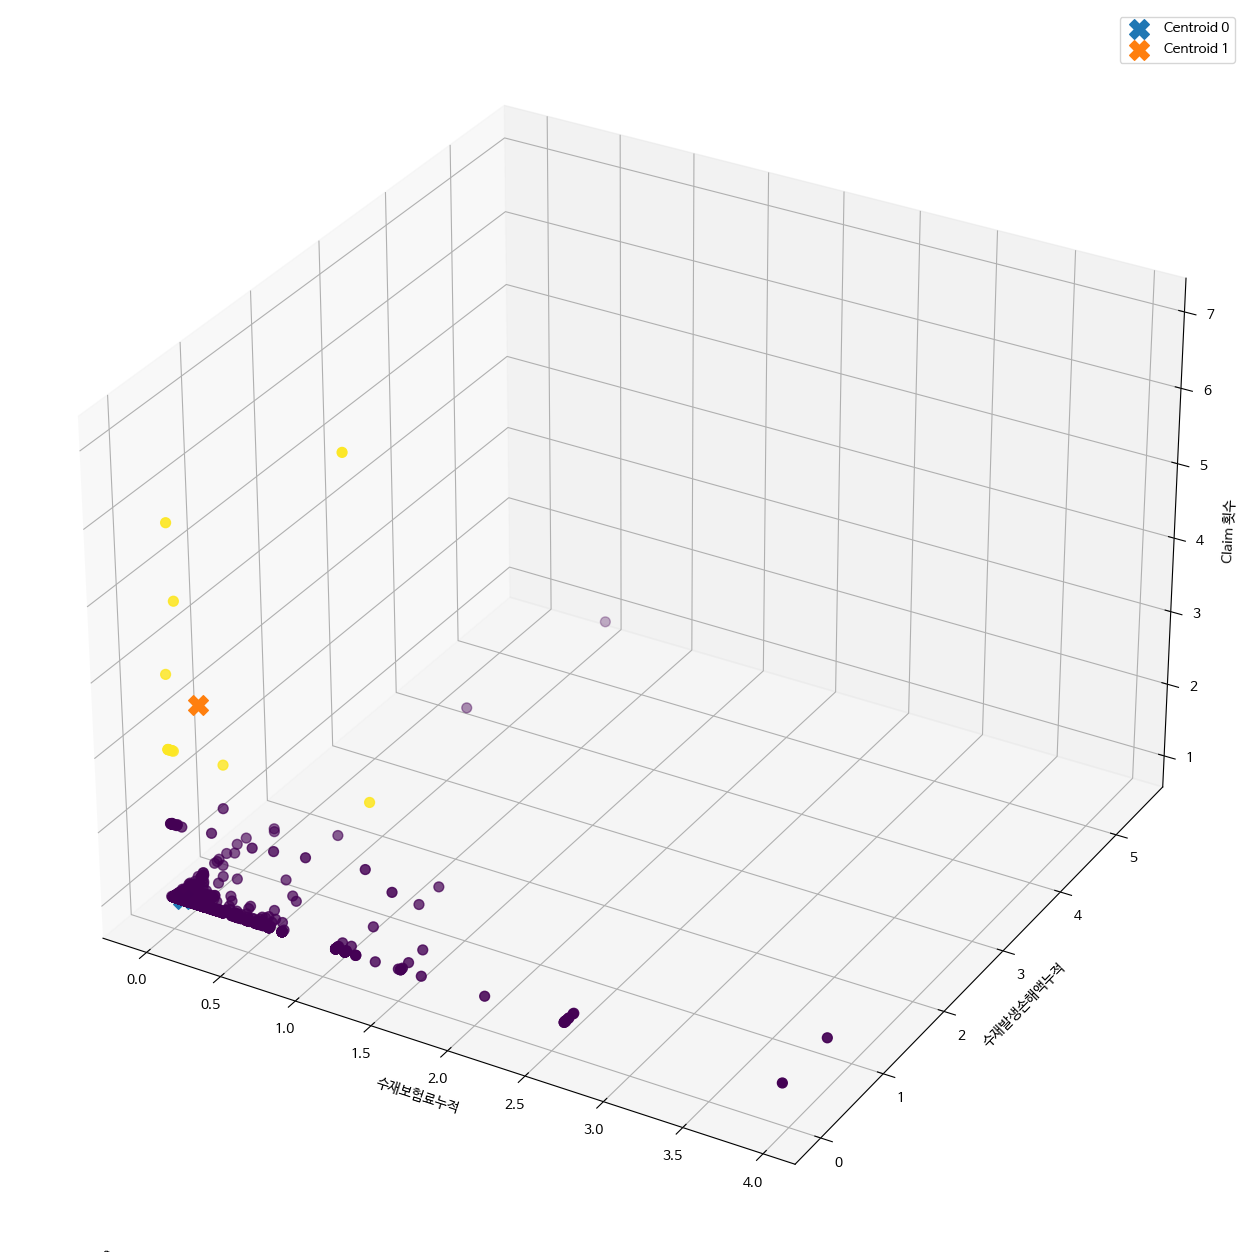

In [70]:
# 시각화를 위해 스케일링 이전의 값으로 되돌리기
inverse_scaled_data = scaler.inverse_transform(scaled_data)

# 3차원 공간에서 시각화
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 0과 클러스터 1을 서로 다른 색으로 표시
ax.scatter(inverse_scaled_data[:, 0], inverse_scaled_data[:, 1], inverse_scaled_data[:, 2], c=df['Cluster'], cmap='viridis', s=50)

# 클러스터 중심 표시 (클러스터마다 색과 모양 다르게 지정)
for cluster_num, centroid in enumerate(centroids_original):
    ax.scatter(centroid[0], centroid[1], centroid[2], c=f'C{cluster_num}', marker='X', s=200, label=f'Centroid {cluster_num}')

# 축 레이블 지정
ax.set_xlabel('수재보험료누적')
ax.set_ylabel('수재발생손해액누적')
ax.set_zlabel('Claim 횟수')

# 범례 표시
ax.legend()

plt.show()

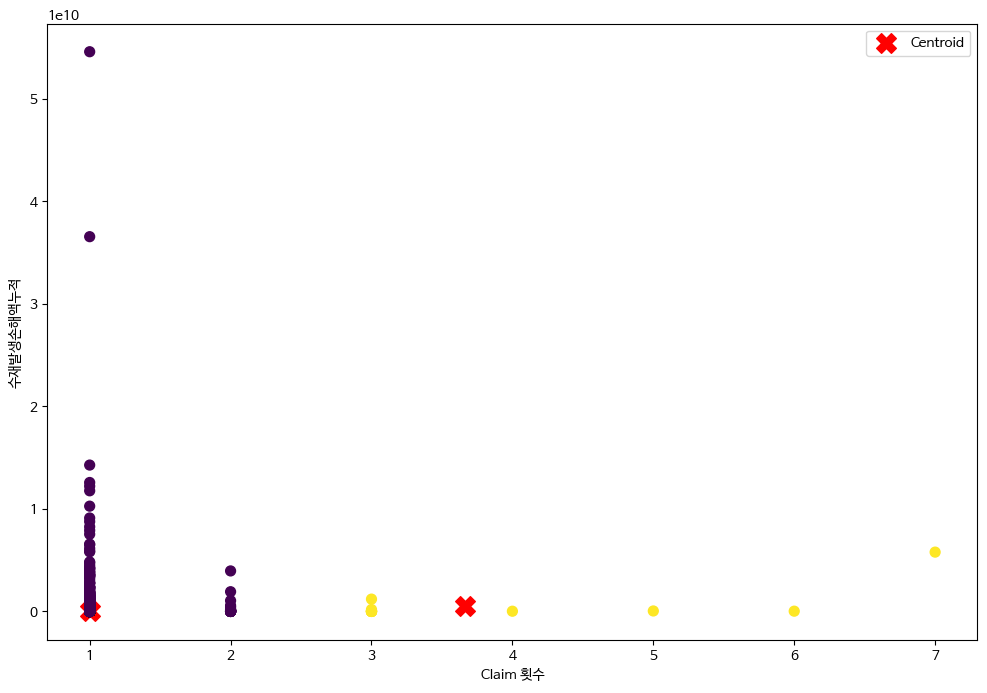

In [71]:
import matplotlib.pyplot as plt

# 2차원 공간에서 시각화
plt.figure(figsize=(12, 8))

# 클러스터 중심 표시
plt.scatter(centroids_original[:, 2], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroid')

# 클러스터 0과 클러스터 1을 서로 다른 색으로 표시
scatter = plt.scatter(inverse_scaled_data[:, 2], inverse_scaled_data[:, 1], c=df['Cluster'], cmap='viridis', s=50)

# 축 레이블 지정
plt.xlabel('Claim 횟수')
plt.ylabel('수재발생손해액누적')

# 범례 표시
plt.legend()

# 컬러바 표시
# plt.colorbar(scatter, label='Cluster')

plt.show()



*   결론적으로 Claim 횟수가 클러스터링 결과에 너무 큰 영향을 미치고있다.
*   발생손해액누적은 아예 무시되는 수준




## DBSCAN

In [73]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: 이웃과의 최대 거리, min_samples: 클러스터에 필요한 최소 데이터포인트 수
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

<ipython-input-73-1a538f01f045>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)


In [74]:
# 클러스터링 결과 확인
cluster_counts_dbscan = df['DBSCAN_Cluster'].value_counts()
for cluster_num, count in cluster_counts_dbscan.items():
    print(f"DBSCAN Cluster {cluster_num}: {count} data points")

DBSCAN Cluster 0: 9966 data points
DBSCAN Cluster 4: 56 data points
DBSCAN Cluster -1: 52 data points
DBSCAN Cluster 1: 18 data points
DBSCAN Cluster 3: 13 data points
DBSCAN Cluster 2: 9 data points
DBSCAN Cluster 5: 6 data points


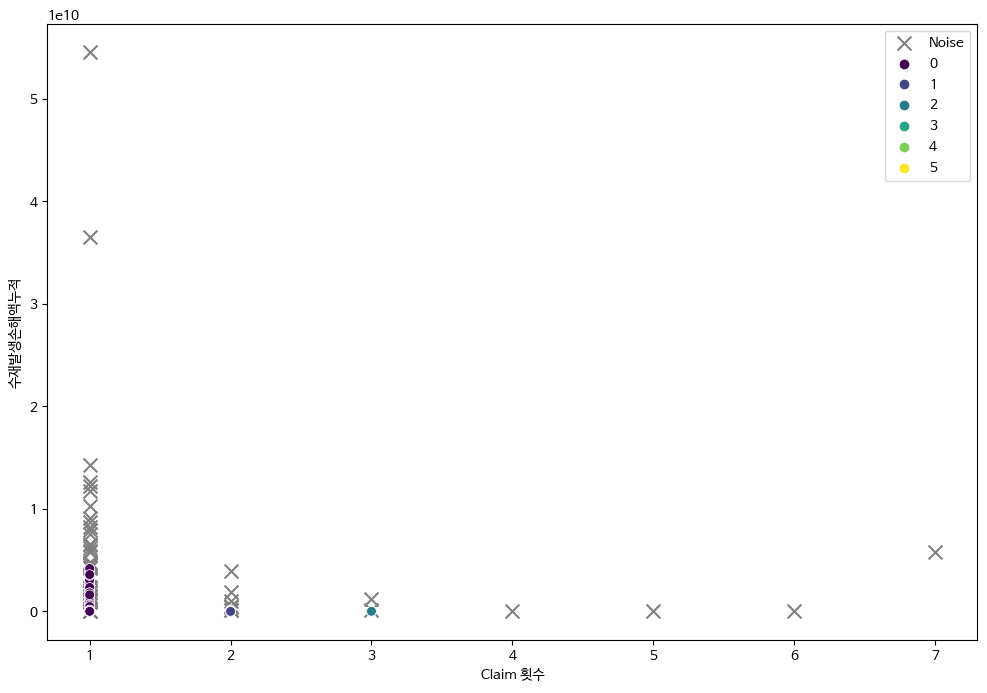

In [75]:
# 시각화를 위한 2차원 플롯 (x축: 'claim횟수', y축: '수재발생손해액누적')
plt.figure(figsize=(12, 8))

# 노이즈 포인트를 회색 'x'로 표시, 52개 존재
noise_points = df[df['DBSCAN_Cluster'] == -1]
plt.scatter(noise_points['claim횟수'], noise_points['수재발생손해액누적'], c='grey', marker='x', label='Noise', s=100)

# 클러스터 표시 (동그라미로는 표시하지 않음)
sns.scatterplot(x='claim횟수', y='수재발생손해액누적', hue='DBSCAN_Cluster', data=df[df['DBSCAN_Cluster'] != -1], palette='viridis', s=50)

# 축 레이블 지정
plt.xlabel('Claim 횟수')
plt.ylabel('수재발생손해액누적')

# 범례 표시
plt.legend()

plt.show()


In [76]:
# 노이즈에 해당하는 데이터의 행을 추출
noise_data = df[df['DBSCAN_Cluster'] == -1]

# 부동소수점 표기법 수정 및 천 단위 쉼표 사용
noise_data['수재보험료누적'] = noise_data['수재보험료누적'].apply(lambda x: '{:,.0f}'.format(x))
noise_data['수재발생손해액누적'] = noise_data['수재발생손해액누적'].apply(lambda x: '{:,.0f}'.format(x))

<ipython-input-76-7946fe8917e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_data['수재보험료누적'] = noise_data['수재보험료누적'].apply(lambda x: '{:,.0f}'.format(x))
<ipython-input-76-7946fe8917e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_data['수재발생손해액누적'] = noise_data['수재발생손해액누적'].apply(lambda x: '{:,.0f}'.format(x))


In [77]:
print("Noise Data:")
display(noise_data)

Noise Data:


,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,claim횟수,Cluster,DBSCAN_Cluster
29,2020 CHINA SOUTHERN FLOOD,C2019022319805,201901,기술보험,"9,500,780,415","5,787,074,608",7,1,-1
75,202007~08 Monsoon Rainfall,C2020024149170,202001,기술보험,"2,593,173,024","408,441,732",2,0,-1
147,202007~08 Monsoon Rainfall,C2020019751824,202001,기술보험,"97,092,712","22,508,620",4,1,-1
310,202007~08 Monsoon Rainfall,C2017026631049,201701,기술보험,"3,651,374,820","189,769,499",3,1,-1
312,202007~08 Monsoon Rainfall,C2017012985252,201601,기술보험,"5,755,677,905","2,325,504,963",1,0,-1
320,202007~08 Monsoon Rainfall,C2015022631057,201501,기술보험,"5,429,856,164","163,227,262",2,0,-1
323,202007~08 Monsoon Rainfall,C2015019950113,201501,기술보험,"14,675,960,610","156,961,432",2,0,-1
363,2022.08 Monsoon Rainfall,C2022022814840,202201,기술보험,"2,117,595,616","4,753,284,550",1,0,-1
455,2022.08 Monsoon Rainfall,C2020024648403,202001,기술보험,"12,854,991,159","1,202,723,987",3,1,-1
459,2022.08 Monsoon Rainfall,C2019035979262,201901,기술보험,"6,669,782,838","573,299,795",2,0,-1


## DBSCAN 에서 -1 인 노이즈를 제외하고, k=2 인 k-means 클러스터링

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN에서 -1인 노이즈를 제외한 데이터 추출
filtered_data = df[df['DBSCAN_Cluster'] != -1]

# 필요한 열만 선택
selected_columns = ['수재보험료누적', '수재발생손해액누적', 'claim횟수']
selected_data = filtered_data[selected_columns]

# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=1000, random_state=42)
filtered_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-78-0bdc0ea29468>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)


In [79]:
# Check the count of data points in each cluster
print(filtered_data['KMeans_Cluster'].value_counts())

0    10041
1       27
Name: KMeans_Cluster, dtype: int64


In [81]:
cluster_1_data = filtered_data[filtered_data['KMeans_Cluster'] == 1]
display(cluster_1_data)

,unique_claim_id,계약번호,UY,종목명,수재보험료누적,수재발생손해액누적,claim횟수,Cluster,DBSCAN_Cluster,KMeans_Cluster
84,202007~08 Monsoon Rainfall,C2020023569673,202001,기술보험,215620080.0,48299934.0,2,0,1,1
89,202007~08 Monsoon Rainfall,C2020023276157,202001,기술보험,139147125.0,193460.0,3,1,2,1
127,202007~08 Monsoon Rainfall,C2020021241712,202001,기술보험,55499577.0,14850653.0,3,1,2,1
160,202007~08 Monsoon Rainfall,C2020018915794,202001,기술보험,75642381.0,2797127.0,3,1,2,1
198,202007~08 Monsoon Rainfall,C2020012183674,202001,기술보험,39943166.0,12514331.0,2,0,1,1
206,202007~08 Monsoon Rainfall,C2020010273098,201901,기술보험,84230529.0,8044937.0,3,1,2,1
223,202007~08 Monsoon Rainfall,C2019040263451,201901,기술보험,41735565.0,3255624.0,3,1,2,1
238,202007~08 Monsoon Rainfall,C2019036738570,201901,기술보험,19463504.0,340169.0,2,0,1,1
250,202007~08 Monsoon Rainfall,C2019033457459,201901,기술보험,32166924.0,12784017.0,2,0,1,1
304,202007~08 Monsoon Rainfall,C2017028866916,201701,기술보험,416489728.0,145276546.0,2,0,1,1




*   Cluster 열과 DBSCAN_Cluster 열을 추가적으로 해석하기
*   항목 추가



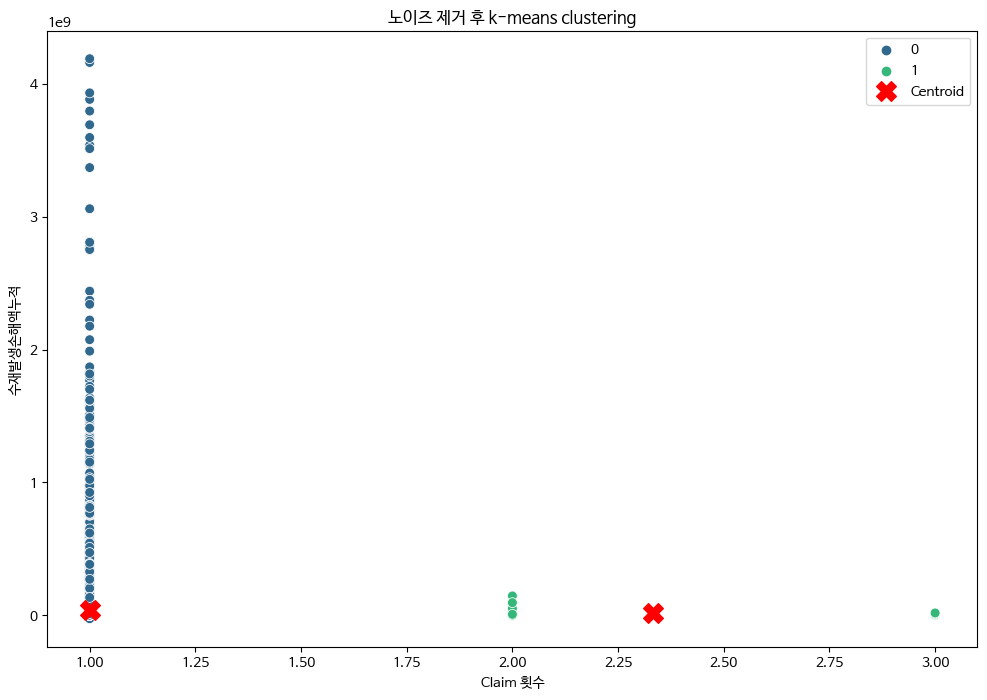

In [82]:
# 시각화를 위한 2차원 플롯 (x축: 'claim횟수', y축: '수재발생손해액누적')
plt.figure(figsize=(12, 8))

# 클러스터 표시
sns.scatterplot(x='claim횟수', y='수재발생손해액누적', hue='KMeans_Cluster', data=filtered_data, palette='viridis', s=50)

# 중심 표시
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)
plt.scatter(centroids_original[:, 2], centroids_original[:, 1], c='red', marker='X', label='Centroid', s=200)

# 축 레이블 지정
plt.title('노이즈 제거 후 k-means clustering')
plt.xlabel('Claim 횟수')
plt.ylabel('수재발생손해액누적')

# 범례 표시
plt.legend()

plt.show()



*   불균형이 여전히 심각
*   항목 추가



## z>3 인 아웃라이어 제외하고, k=2 인 k-means 클러스터링

In [20]:
from scipy.stats import zscore

# 필요한 열만 선택
selected_columns = ['수재보험료누적', '수재발생손해액누적', 'claim횟수']
selected_data = df[selected_columns]

# 수재발생손해액누적 NaN 값이 있는 행 제외
df = selected_data.dropna(subset=['수재발생손해액누적'])
# 수재보험료누적 NaN 값 처리 (0으로 대체)
df.fillna(0, inplace=True)

# 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Z-score를 이용한 이상치 제거
z_scores = zscore(scaled_data)
outliers = (z_scores > 3).any(axis=1)
df = df[~outliers].reset_index(drop=True)  # Reset the index

# 열들에 대한 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['수재보험료누적', '수재발생손해액누적', 'claim횟수']])

# K-means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
# 클러스터별 데이터 개수 출력
print(df['cluster'].value_counts())

0    9421
1     472
Name: cluster, dtype: int64


In [23]:
df[df['cluster'] == 1]

,수재보험료누적,수재발생손해액누적,claim횟수,cluster
28,5.494530e+08,6.726863e+08,1,1
35,2.563770e+09,3.479510e+05,1,1
64,4.441007e+08,6.542861e+08,1,1
66,5.755678e+09,2.325505e+09,1,1
73,2.520889e+09,4.537200e+05,1,1
...,...,...,...,...
9868,1.633842e+09,1.618937e+09,1,1
9869,5.755678e+09,4.142750e+05,1,1
9871,9.272564e+08,3.828065e+08,1,1
9872,1.220400e+09,6.186293e+08,1,1


In [22]:
# 클러스터 1에 해당하는 데이터 필터링
cluster_1_data = df[df['cluster'] == 1]

# 최소 수재발생손해액누적 값 찾기
min_claim_loss_accumulated = cluster_1_data['수재발생손해액누적'].min()

print("클러스터 1 중에서 최소 수재발생손해액누적 값:", min_claim_loss_accumulated)

클러스터 1 중에서 최소 수재발생손해액누적 값: 520.0


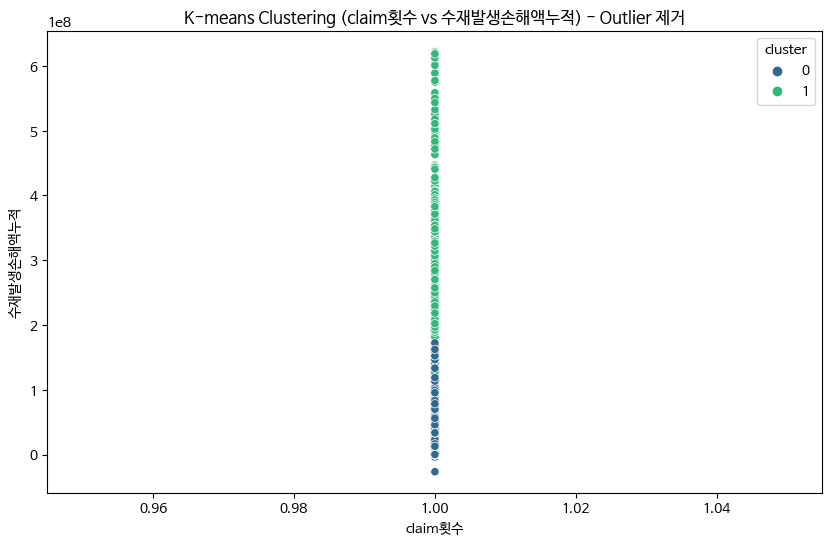

In [85]:
# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='claim횟수', y='수재발생손해액누적', hue='cluster', palette='viridis')
plt.title('K-means Clustering (claim횟수 vs 수재발생손해액누적) - Outlier 제거')
plt.xlabel('claim횟수')
plt.ylabel('수재발생손해액누적')
plt.show()

In [86]:
# 클러스터 중심 출력
centroid_cluster_0 = scaler.inverse_transform(kmeans.cluster_centers_[0].reshape(1, -1)).flatten()
centroid_cluster_1 = scaler.inverse_transform(kmeans.cluster_centers_[1].reshape(1, -1)).flatten()

# 요소에 대해 e 없애고 천단위 쉼표 쓰기
np.set_printoptions(formatter={'float_kind': '{:,.0f}'.format})
print("Centroid for Cluster 0:", centroid_cluster_0)
print("Centroid for Cluster 1:", centroid_cluster_1) #보험료, 손해액, 빈도

Centroid for Cluster 0: [300,448,476 9,028,751 1]
Centroid for Cluster 1: [1,995,425,898 144,872,120 1]


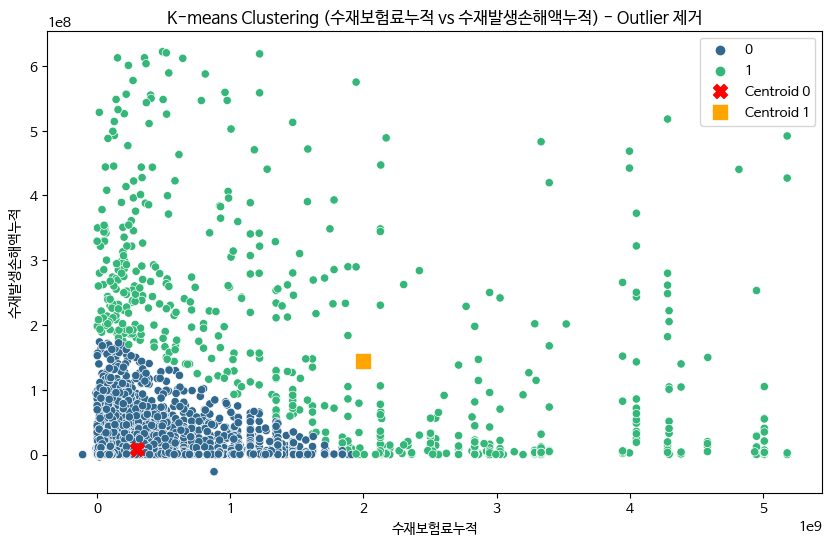

In [97]:
# 일직선 꼴보기 싫어서 보험료 vs 손해액 시각화
plt.figure(figsize=(10, 6))

# 데이터 포인트 시각화
sns.scatterplot(data=df, x='수재보험료누적', y='수재발생손해액누적', hue='cluster', palette='viridis')

# 클러스터 중심 표시
marker_cluster_0 = 'X'  # 클러스터 0의 marker는 'X'
marker_cluster_1 = 's'  # 클러스터 1의 marker는 's'
plt.scatter(centroid_cluster_0[0], centroid_cluster_0[1], c='red', marker=marker_cluster_0, s=100, label='Centroid 0')
plt.scatter(centroid_cluster_1[0], centroid_cluster_1[1], c='orange', marker=marker_cluster_1, s=100, label='Centroid 1')

plt.title('K-means Clustering (수재보험료누적 vs 수재발생손해액누적) - Outlier 제거')
plt.xlabel('수재보험료누적')
plt.ylabel('수재발생손해액누적')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


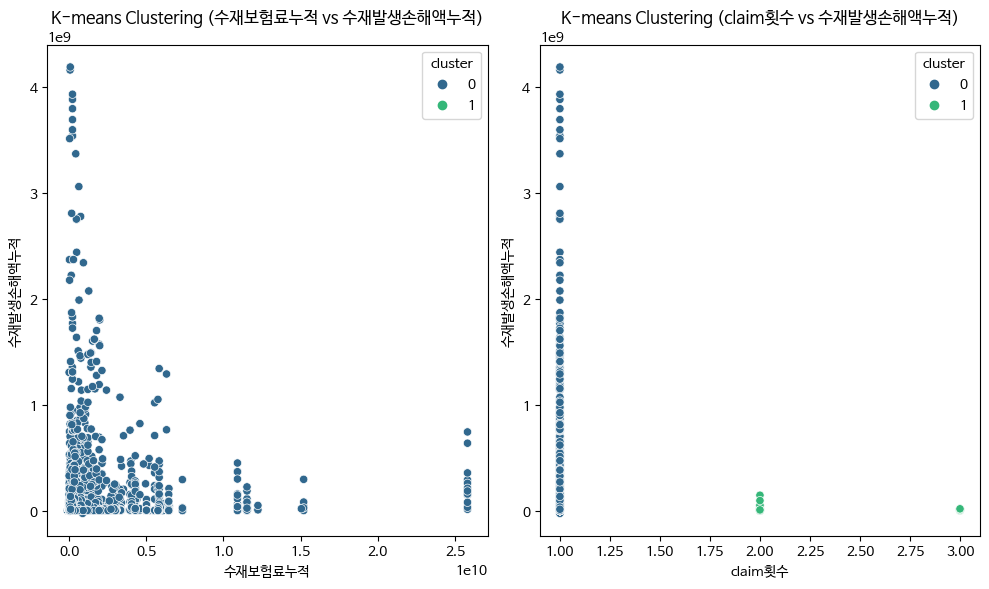

In [98]:
import seaborn as sns

# 수재발생손해액누적 NaN 값이 있는 행 제외
df = selected_data.dropna(subset=['수재발생손해액누적'])
# 수재보험료누적 NaN 값 처리 (0으로 대체)
df.fillna(0, inplace=True)

# 열들에 대한 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['수재보험료누적', '수재발생손해액누적', 'claim횟수']])

# K-means 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# 시각화
plt.figure(figsize=(10, 6))

# '수재보험료누적' vs '수재발생손해액누적'
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='수재보험료누적', y='수재발생손해액누적', hue='cluster', palette='viridis')
plt.title('K-means Clustering (수재보험료누적 vs 수재발생손해액누적)')
plt.xlabel('수재보험료누적')
plt.ylabel('수재발생손해액누적')


# '수재보험료누적' vs 'claim횟수'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='claim횟수', y='수재발생손해액누적', hue='cluster', palette='viridis')
plt.title('K-means Clustering (claim횟수 vs 수재발생손해액누적)')
plt.xlabel('claim횟수')
plt.ylabel('수재발생손해액누적')

plt.tight_layout()
plt.show()

In [99]:
# Check the unique values in the 'Cluster' column
print(df['cluster'].unique())

# Check the count of data points in each cluster
print(df['cluster'].value_counts())

[0 1]
0    10041
1       27
Name: cluster, dtype: int64


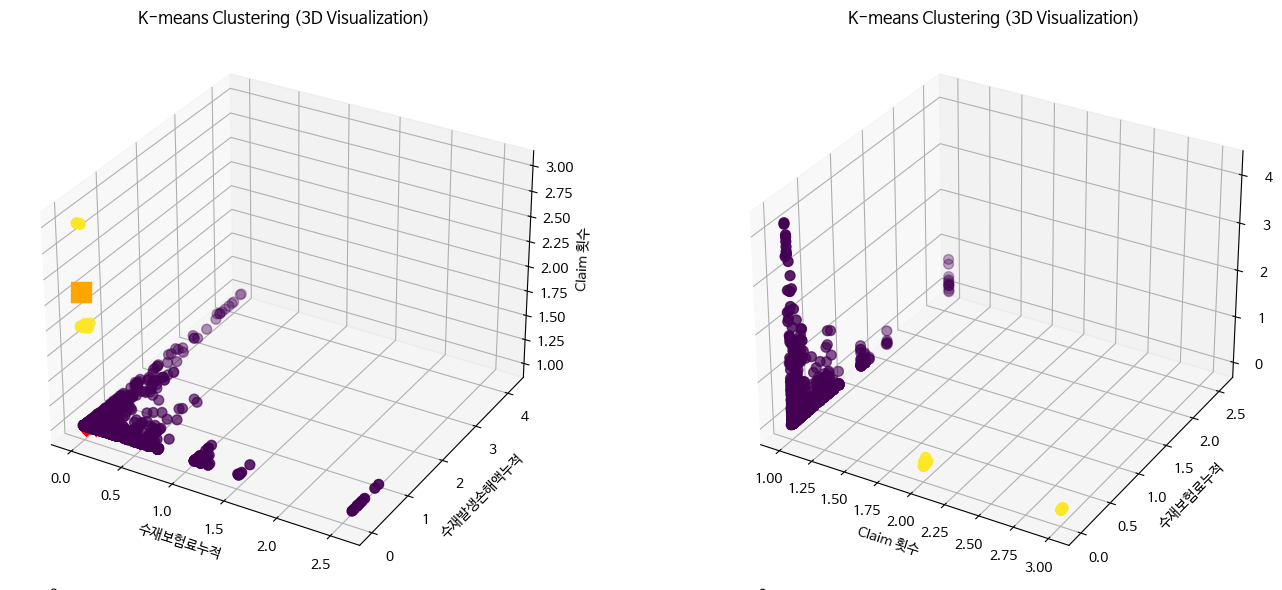

In [100]:
from mpl_toolkits.mplot3d import Axes3D

# 시각화
fig = plt.figure(figsize=(15, 6))

# 3차원 공간에서 시각화
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df['수재보험료누적'], df['수재발생손해액누적'], df['claim횟수'], c=df['cluster'], cmap='viridis', s=50)
ax1.set_xlabel('수재보험료누적')
ax1.set_ylabel('수재발생손해액누적')
ax1.set_zlabel('Claim 횟수')
ax1.set_title('K-means Clustering (3D Visualization)')

# 클러스터 중심 표시
for cluster_num, centroid in enumerate(centroids_original):
    ax1.scatter(centroid[0], centroid[1], centroid[2], c=colors[cluster_num], marker=markers[cluster_num], s=200, label=f'Centroid {cluster_num}')

# '수재보험료누적' vs 'claim횟수'
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df['claim횟수'], df['수재보험료누적'], df['수재발생손해액누적'], c=df['cluster'], cmap='viridis', s=50)
ax2.set_xlabel('Claim 횟수')
ax2.set_ylabel('수재보험료누적')
ax2.set_zlabel('수재발생손해액누적')
ax2.set_title('K-means Clustering (3D Visualization)')

plt.tight_layout()
plt.show()
